# start_pakistan_correlations
## FL_plotPrecip.ipynb
This script plots precipitation time series data for the Indus basin, Pakistan. Data was extracted via Google Earth Engine, from the CHIRPS dataset between 1981 and 2022 inclusive, with mean, median and 95%ile for the entire Indus basin (using the shapefile of the basin used by JBA, and originaly built from Hydrobasins basin delineations).

In [39]:
from pathlib import Path
import os
import sys
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt

In [2]:
# Set the root path
rootPath = Path('C:/Users/alexa/Documents/02_work/02_start/02_deliv/05_pk_correlation/fl/data')

## Load the CHIRPS time series data

In [15]:
precip = pd.read_csv(rootPath/'chirps/CHIRPSDailyIndus1981-2022.csv')
precip.index = [pd.to_datetime(item, format='%Y%m%d') for item in precip.date]
precip=precip.drop('date',axis=1)
precip

,mean,median,p95
1981-01-01,0.000000,0.000000,0.000000
1981-01-02,2.616719,0.000036,13.866395
1981-01-03,3.128428,0.000000,15.615570
1981-01-04,4.383004,0.619525,16.365246
1981-01-05,0.728298,0.000000,5.691761
...,...,...,...
2022-12-27,0.000000,0.000000,0.000000
2022-12-28,0.114238,0.000000,0.000000
2022-12-29,1.790827,0.000000,6.558889
2022-12-30,0.000592,0.000000,0.000000


In [20]:
precip.iloc[:,0]

1981-01-01    0.000000
1981-01-02    2.616719
1981-01-03    3.128428
1981-01-04    4.383004
1981-01-05    0.728298
                ...   
2022-12-27    0.000000
2022-12-28    0.114238
2022-12-29    1.790827
2022-12-30    0.000592
2022-12-31    0.005485
Name: mean, Length: 15340, dtype: float64

## Plot the time series precip data

In [21]:
colors=[
(68/255,84/255,106/255),    
(254/255,106/255,70/255), 
(133/255,239/255,205/255),
(255/255,192/255,0/255),    
(165/255,165/255,165/255), 
(255/255,193/255,179/255), 
(184/255,193/255,218/255),    
(24/255,186/255,134/255)
]

In [49]:
xtickLabs=list(range(precip.index.year.min(), precip.index.year.max()+1, 2))
xticks=[datetime.date(year=item,month=1,day=1) for item in xtickLabs]

In [59]:
precip.index[int(len(precip.index)//2)], precip.index[int(len(precip.index)//1.8)]

(Timestamp('2002-01-01 00:00:00'), Timestamp('2004-05-02 00:00:00'))

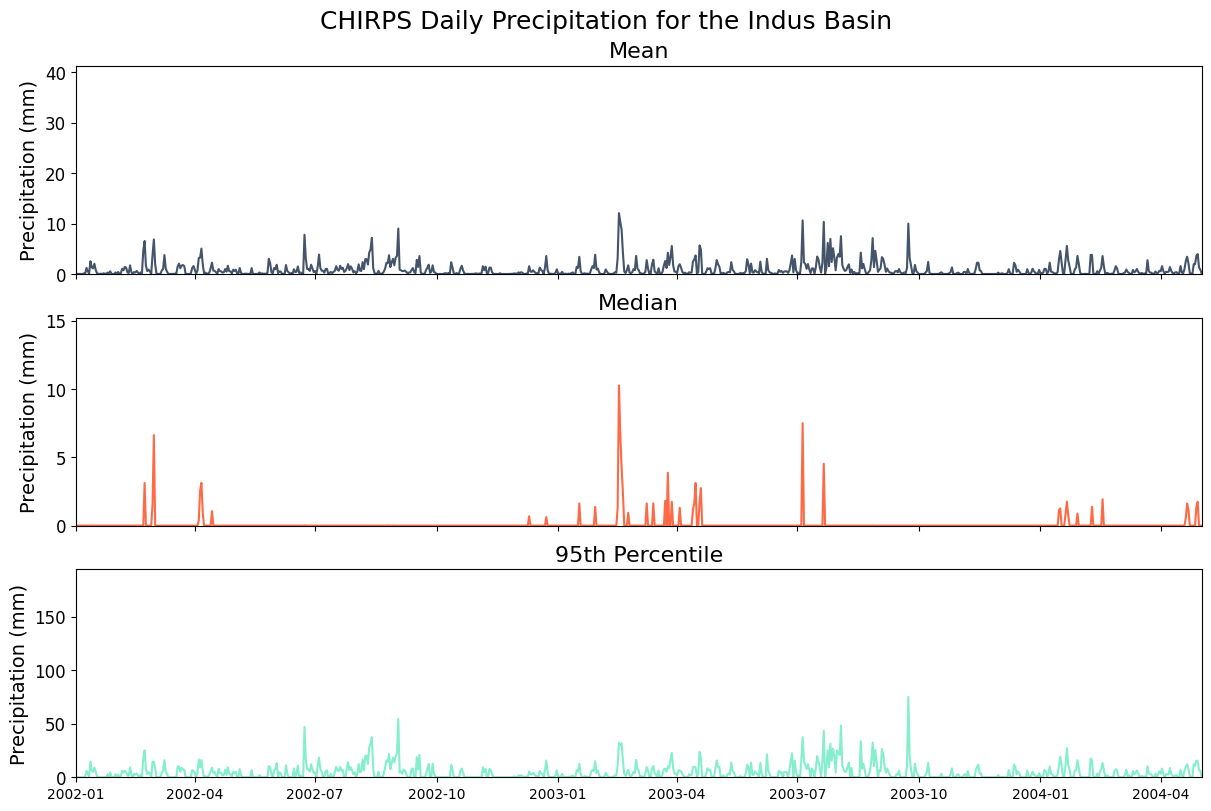

In [62]:
plotTitles=['Mean','Median','95th Percentile']

fig, axes = plt.subplots(3,1,figsize=(12,8), sharex=True, constrained_layout=True)
fig.suptitle('CHIRPS Daily Precipitation for the Indus Basin', fontsize=18)
    
for i, ax in enumerate(axes.ravel()):
    ax.set_title(plotTitles[i], fontsize=16)
    ax.plot(precip.index, precip.iloc[:,i], marker='none', linestyle='-', color=colors[i])
    ax.set_ylabel('Precipitation (mm)', fontsize=14)
    # ax.set_xlim(precip.index.min(), precip.index.max())
    ax.set_xlim(precip.index[int(len(precip.index)//2)], precip.index[int(len(precip.index)//1.8)])
    ax.set_ylim(bottom=0)
    # ax.set_xticks(xticks, xtickLabs, rotation=45, fontsize=12, ha='right')
    ax.tick_params(axis='y',labelsize=12)

plt.show()